<h3> Position Recognition

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Autocanny function to detect edges in image

In [3]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # construct two thresholds using the median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    print("lower:", lower, "upper:", upper)

    # return the edged image
    return edged


Show_In_Notebook function to show opencv image with matplotlib

In [4]:
def show_in_notebook(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

Load the original image

In [ ]:
img = cv2.imread("../img/highres_board.jpeg")
show_in_notebook(img)

Do Edge Detection

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray,110,320,apertureSize = 3)
show_in_notebook(edges)

Do Hough Transformation

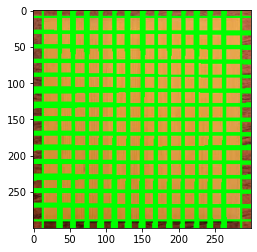

In [9]:
lines = cv2.HoughLines(edges,1,np.pi/180,110)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 2000*(-b))
    y1 = int(y0 + 2000*(a))
    x2 = int(x0 - 2000*(-b))
    y2 = int(y0 - 2000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

show_in_notebook(img)

Separate Horizontal and Vertical Lines

In [10]:
hori = []
verti = []

for line in lines:
    rho, theta = line[0]
    if theta <= 1.6 and theta >= 1.5:
        verti.append(line)
    else:
        hori.append(line)

Visualize

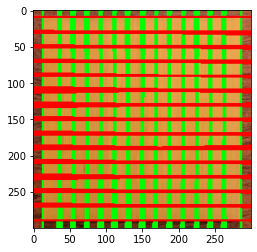

In [11]:
img = cv2.imread("../img/highres_board.jpeg")
for line in hori:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 2000*(-b))
    y1 = int(y0 + 2000*(a))
    x2 = int(x0 - 2000*(-b))
    y2 = int(y0 - 2000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
for line in verti:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 2000*(-b))
    y1 = int(y0 + 2000*(a))
    x2 = int(x0 - 2000*(-b))
    y2 = int(y0 - 2000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
show_in_notebook(img)

Find the Intersections

In [12]:
def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.
    Returns closest integer pixel locations.
    """
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return [x0, y0]

intersections = []
for xline in hori:
    for yline in verti:
        intersections.append(intersection(xline, yline))

Visualize

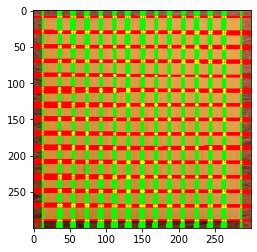

In [13]:
for intersect in intersections:
    x0 = intersect[0]
    y0 = intersect[1]

    img = cv2.circle(img, (x0, y0), radius=1, color=(0, 255, 255), thickness=-1)
show_in_notebook(img)

Use KMeans to sepatate the intersections, use the mean value as the final check point

In [14]:
from sklearn.cluster import KMeans
X = np.array(intersections)
kmeans = KMeans(n_clusters=225, random_state=0).fit(X)

Visualize

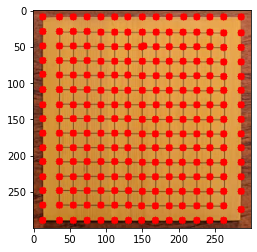

In [15]:
img = cv2.imread('../img/highres_board.jpeg')
for center in kmeans.cluster_centers_:
    img = cv2.circle(img, [int(center[0]), int(center[1])], 5, (0,0,255), -1)
show_in_notebook(img)